In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix
#for the 2nd part
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
#for the 2nd part
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
#loading the images
images = np.load("/mnt/c/users/admin/desktop/F21DL/smiley_dataset/smiley_X.npy")

In [3]:
#loading the classes
classes = np.load("/mnt/c/users/admin/desktop/F21DL/smiley_dataset/smiley_Y.npy")

In [4]:
print("Images shape:", images.shape)


Images shape: (204, 9, 9, 1)


In [5]:
print("Classes shape:", classes.shape)

Classes shape: (204,)


In [6]:
#verifying the number of unique classes with their corresponding leabels
# Get the unique classes and their counts
unique_classes, class_counts = np.unique(classes, return_counts=True)
# Print the unique classes and their counts
for class_label, count in zip(unique_classes, class_counts):
    print("Class:", class_label, "Count:", count)


Class: 0.0 Count: 72
Class: 1.0 Count: 60
Class: 2.0 Count: 72


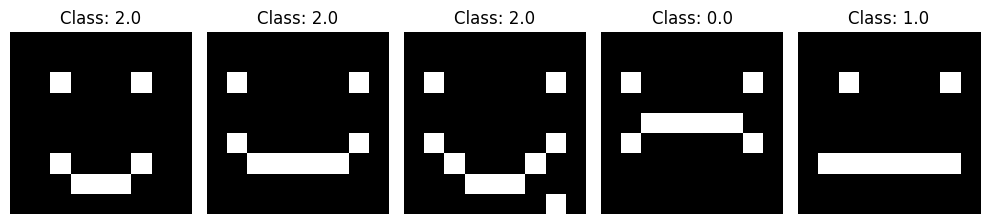

In [7]:
# Select some random indices for visualization
indices = np.random.choice(len(images), size=5, replace=False)

# Plot the selected images
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
for i, index in enumerate(indices):
    axes[i].imshow(images[index, :, :, 0], cmap='gray')
    axes[i].set_title(f"Class: {classes[index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.2, random_state=42)

In [9]:
# Create an instance of the Naïve Bayes classifier
naive_bayes = GaussianNB()



In [10]:
# Train the classifier on the training set
naive_bayes.fit(X_train.reshape(X_train.shape[0], -1), y_train)



GaussianNB()

In [11]:
# Reshape the testing set to match the input format
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


In [12]:

# Make predictions on the testing set
y_pred = naive_bayes.predict(X_test_reshaped)


In [13]:

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6585365853658537


In [14]:
# Generate and print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)



Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.38      0.67      0.48         9
         2.0       0.79      0.65      0.71        17

    accuracy                           0.66        41
   macro avg       0.69      0.66      0.65        41
weighted avg       0.74      0.66      0.68        41



In [15]:
# Generate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Confusion Matrix:
 [[10  4  1]
 [ 1  6  2]
 [ 0  6 11]]


In [16]:

# Calculate and print TP rate, FP rate, precision, recall, and F measure
tp_rate = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[1, 0])
fp_rate = confusion_mat[0, 1] / (confusion_mat[0, 1] + confusion_mat[0, 0])
precision = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[0, 1])
recall = tp_rate
f_measure = 2 * (precision * recall) / (precision + recall)


In [17]:

print("TP Rate:", tp_rate)
print("FP Rate:", fp_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F Measure:", f_measure)



TP Rate: 0.8571428571428571
FP Rate: 0.2857142857142857
Precision: 0.6
Recall: 0.8571428571428571
F Measure: 0.7058823529411764


In [18]:
# Calculate and print ROC area
if len(unique_classes) == 2:  # Binary classification
    roc_area = roc_auc_score(y_test, y_pred)
else:  # Multi-class classification
    y_prob = naive_bayes.predict_proba(X_test_reshaped)
    roc_area = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC Area:", roc_area)

ROC Area: 0.8387867647058823


In [19]:
#THIS IS THE BEGINING OF THE SECOND PART OF THE ASSIGNMENT
#PART TWO BEGINS HERE
evaluation_scores = []
images_2d = images.reshape(images.shape[0], -1)


In [20]:
# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the k-means algorithm to the data
kmeans.fit(images_2d)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [21]:
# Get the predicted cluster labels for the samples
cluster_labels = kmeans.labels_

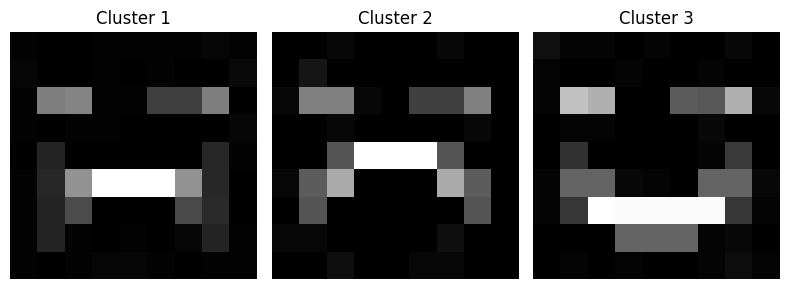

In [22]:
# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Define the image dimensions
image_height = 9
image_width = 9

# Plot the cluster centers
plt.figure(figsize=(8, 3))
for i, center in enumerate(cluster_centers):
    plt.subplot(1, len(cluster_centers), i + 1)
    plt.imshow(center.reshape((image_height, image_width)), cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i+1}')
plt.tight_layout()
plt.show()


In [23]:


# Calculate the ARI between the cluster labels and the ground truth labels
kmeans_ari = adjusted_rand_score(classes, cluster_labels)
print("Adjusted Rand Index (ARI):", kmeans_ari)


Adjusted Rand Index (ARI): 0.31288134543314644


In [24]:
#implemeningt NMI for Kmeans clustering
kmeans_nmi = normalized_mutual_info_score(classes, cluster_labels)
#print the NMI score
print("NMI SCORe:", kmeans_nmi)

NMI SCORe: 0.40829222303576546


In [25]:
# Store the scores for K-means
kmeans_scores = {
    "ARI": kmeans_ari,
    "NMI": kmeans_nmi
}
evaluation_scores.append(("K-means", kmeans_scores))


In [26]:
#implementing EM cLustering using GMM

# Create an instance of the GaussianMixture algorithm
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the GMM to the data
gmm.fit(images_2d)

# Get the cluster labels
gmm_labels = gmm.predict(images_2d)

# Calculate the ARI for the GMM clustering
gmm_ari = adjusted_rand_score(classes, gmm_labels)

# Print the ARI score
print("Adjusted Rand Index (ARI):", gmm_ari)

Adjusted Rand Index (ARI): 0.1738089537945894


In [27]:
#implemeningt NMI for GMM clustering
gmm_nmi = normalized_mutual_info_score(classes, gmm_labels)
#print the NMI score
print("NMI SCORE:", gmm_nmi)

NMI SCORE: 0.2620522555057271


In [28]:
# Store the scores for GMM
gmm_scores = {
    "ARI": gmm_ari,
    "NMI": gmm_nmi
}
evaluation_scores.append(("GMM", gmm_scores))

In [29]:
#implementing Hierarchical Clustering
# Create an instance of the AgglomerativeClustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit the hierarchical clustering algorithm to the data
hierarchical.fit(images_2d)

# Get the cluster labels
hierarchical_labels = hierarchical.labels_
# Calculate the ARI for the hierarchical clustering
hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
print("Evaluation Metric Score:", hierarchical_ari)

Evaluation Metric Score: 0.31288134543314644


In [30]:
#implemeningt NMI for HIERARCHICAL clustering
hierarchical_nmi = normalized_mutual_info_score(classes, hierarchical_labels)
#print the NMI score
print("NMI SCORE:", hierarchical_nmi)

NMI SCORE: 0.4082922230357654


In [31]:
# Store the scores for Hierarchical clustering
hierarchical_scores = {
    "ARI": hierarchical_ari,
    "NMI": hierarchical_nmi
}
evaluation_scores.append(("Hierarchical", hierarchical_scores))

In [32]:
# Accessing the scores for K-means
kmeans_scores = evaluation_scores[0][1]
kmeans_ari = kmeans_scores["ARI"]
kmeans_nmi = kmeans_scores["NMI"]
print(kmeans_ari)

0.31288134543314644


In [33]:
for num_clusters in range(2,10):
    kmeans = KMeans(n_clusters = num_clusters,n_init = 10, random_state = 42)
    kmeans.fit(images_2d)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(images_2d, cluster_labels)
    kmeans_ari = adjusted_rand_score(classes, cluster_labels)
    print(f"Number of Clusters:{num_clusters}\t Silhouette Score:{silhouette_avg}\t ARI:{kmeans_ari}")

Number of Clusters:2	 Silhouette Score:0.183491002770273	 ARI:0.338218021142122
Number of Clusters:3	 Silhouette Score:0.2405717947349726	 ARI:0.31288134543314644
Number of Clusters:4	 Silhouette Score:0.2730656760257601	 ARI:0.24362172925633863
Number of Clusters:5	 Silhouette Score:0.2511342639969949	 ARI:0.302549921377835
Number of Clusters:6	 Silhouette Score:0.2729044590525549	 ARI:0.3130655805478571
Number of Clusters:7	 Silhouette Score:0.2617513097951991	 ARI:0.3006140024351069
Number of Clusters:8	 Silhouette Score:0.2836168711744186	 ARI:0.25474060630936235
Number of Clusters:9	 Silhouette Score:0.27126187563898085	 ARI:0.23145394986361165


In [34]:


# Check the number of unique labels
num_unique_labels = len(set(classes))
if num_unique_labels < 2:
    print("Error: Number of unique labels is less than 2. Unable to compute evaluation metrics.")
else:
    # Loop over different numbers of clusters
    for num_clusters in range(2, 10):
        # K-means
        kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
        kmeans.fit(images_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(images_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(classes, kmeans_labels)
        kmeans_nmi = normalized_mutual_info_score(classes, kmeans_labels)
        print(f"K-means: Number of Clusters: {num_clusters}\t Silhouette Score: {kmeans_silhouette}\t ARI: {kmeans_ari}\t NMI Score:{kmeans_nmi}")
        
        #Em clustering using GMM
        gmm = GaussianMixture(n_components = 3, random_state=42)
        gmm.fit(images_2d)
        gmm_labels = gmm.predict(images_2d)
        gmm_silhouette =  silhouette_score(images_2d, gmm_labels)
        gmm_ari = adjusted_rand_score(classes, gmm_labels)
        print(f"EM Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {gmm_silhouette}\t ARI: {gmm_ari}")
        
        
        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(images_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(images_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
        print(f"Hierarchical Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {hierarchical_silhouette}\t ARI: {hierarchical_ari}\n ")

        

K-means: Number of Clusters: 2	 Silhouette Score: 0.183491002770273	 ARI: 0.338218021142122	 NMI Score:0.3616531742267437
EM Clustering: Number of Clusters: 2	 Silhouette Score: 0.2182828790334722	 ARI: 0.1738089537945894
Hierarchical Clustering: Number of Clusters: 2	 Silhouette Score: 0.17892954725892904	 ARI: 0.0900497790704178
 
K-means: Number of Clusters: 3	 Silhouette Score: 0.2405717947349726	 ARI: 0.31288134543314644	 NMI Score:0.40829222303576546
EM Clustering: Number of Clusters: 3	 Silhouette Score: 0.2182828790334722	 ARI: 0.1738089537945894
Hierarchical Clustering: Number of Clusters: 3	 Silhouette Score: 0.2405717947349726	 ARI: 0.31288134543314644
 
K-means: Number of Clusters: 4	 Silhouette Score: 0.2730656760257601	 ARI: 0.24362172925633863	 NMI Score:0.4067037055714909
EM Clustering: Number of Clusters: 4	 Silhouette Score: 0.2182828790334722	 ARI: 0.1738089537945894
Hierarchical Clustering: Number of Clusters: 4	 Silhouette Score: 0.2730656760257601	 ARI: 0.24362172

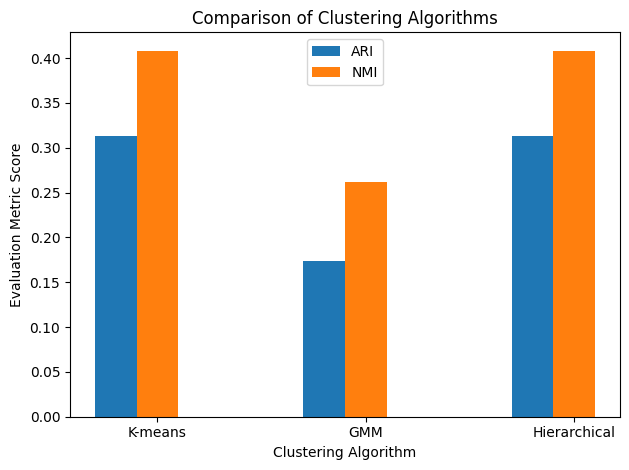

In [35]:
# Create a list of algorithm names and evaluation scores
algorithm_names, scores = zip(*evaluation_scores)

# Get the evaluation metric names (e.g., ARI, NMI)
metric_names = list(evaluation_scores[0][1].keys())

# Set the position of the bars on the x-axis
x = np.arange(len(algorithm_names))

# Set the width of the bars
bar_width = 0.2

# Create subplots for each evaluation metric
fig, ax = plt.subplots()
for i, metric_name in enumerate(metric_names):
    # Calculate the position of each bar
    pos = x + (i - len(metric_names) / 2) * bar_width

    # Get the scores for the current evaluation metric
    metric_scores = [score[1][metric_name] for score in evaluation_scores]

    # Plot the bars for the current evaluation metric
    ax.bar(pos, metric_scores, bar_width, label=metric_name)

# Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(algorithm_names)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Evaluation Metric Score')
plt.title('Comparison of Clustering Algorithms')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

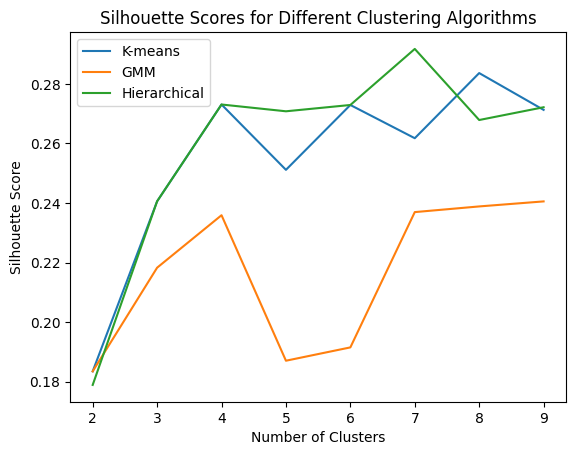

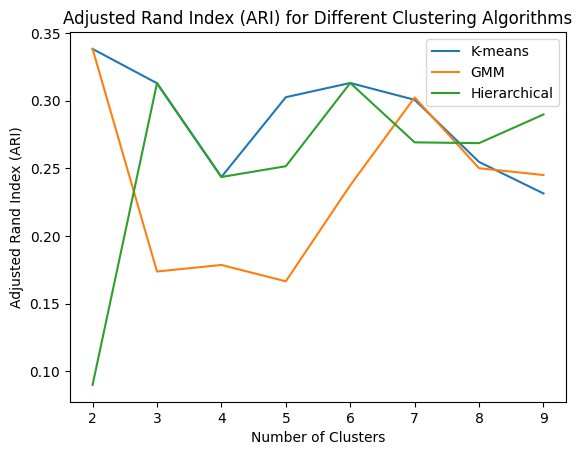

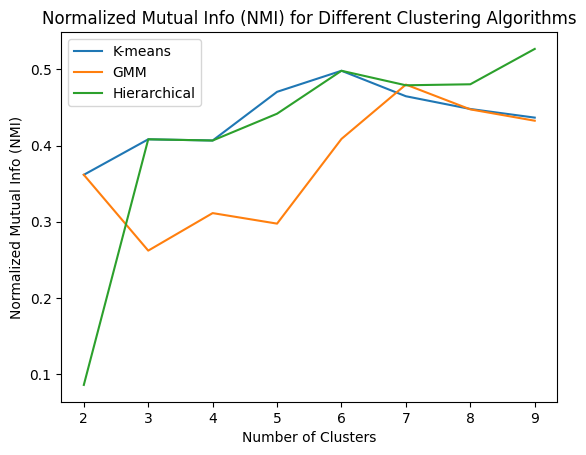

Best number of clusters for K-means: 8
Best number of clusters for GMM: 9
Best number of clusters for Hierarchical: 7


In [36]:

# Check the number of unique labels
num_unique_labels = len(set(classes))
if num_unique_labels < 2:
    print("Error: Number of unique labels is less than 2. Unable to compute evaluation metrics.")
else:
    # Define the range of clusters to explore
    num_clusters_range = range(2, 10)

    # Initialize lists to store evaluation metric scores
    kmeans_silhouette_scores = []
    kmeans_ari_scores = []
    kmeans_nmi_scores=[]
    gmm_silhouette_scores = []
    gmm_ari_scores = []
    gmm_nmi_scores=[]
    hierarchical_silhouette_scores = []
    hierarchical_ari_scores = []
    hierarchical_nmi_scores=[]

    # Loop over different numbers of clusters
    for num_clusters in num_clusters_range:
        # K-means
        kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
        kmeans.fit(images_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(images_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(classes, kmeans_labels)
        kmeans_nmi = normalized_mutual_info_score(classes, kmeans_labels)
        kmeans_silhouette_scores.append(kmeans_silhouette)
        kmeans_ari_scores.append(kmeans_ari)
        kmeans_nmi_scores.append(kmeans_nmi)

        # EM clustering using GMM
        gmm = GaussianMixture(n_components=num_clusters, random_state=42)
        gmm.fit(images_2d)
        gmm_labels = gmm.predict(images_2d)
        gmm_silhouette = silhouette_score(images_2d, gmm_labels)
        gmm_ari = adjusted_rand_score(classes, gmm_labels)
        gmm_nmi = normalized_mutual_info_score(classes, gmm_labels)
        gmm_silhouette_scores.append(gmm_silhouette)
        gmm_ari_scores.append(gmm_ari)
        gmm_nmi_scores.append(gmm_nmi)

        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(images_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(images_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
        hierarchical_nmi = normalized_mutual_info_score(classes, hierarchical_labels)
        hierarchical_silhouette_scores.append(hierarchical_silhouette)
        hierarchical_ari_scores.append(hierarchical_ari)
        hierarchical_nmi_scores.append(hierarchical_nmi)

    # Visualize Silhouette Scores
    plt.plot(num_clusters_range, kmeans_silhouette_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_silhouette_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_silhouette_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.title('Silhouette Scores for Different Clustering Algorithms')
    plt.show()

    # Visualize ARI Scores
    plt.plot(num_clusters_range, kmeans_ari_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_ari_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_ari_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Adjusted Rand Index (ARI)')
    plt.legend()
    plt.title('Adjusted Rand Index (ARI) for Different Clustering Algorithms')
    plt.show()
    
    # Visualize NMI Scores
    plt.plot(num_clusters_range, kmeans_nmi_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_nmi_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_nmi_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Normalized Mutual Info (NMI)')
    plt.legend()
    plt.title('Normalized Mutual Info (NMI) for Different Clustering Algorithms')
    plt.show()

    # Draw Conclusions
    best_kmeans_num_clusters = num_clusters_range[kmeans_silhouette_scores.index(max(kmeans_silhouette_scores))]
    best_gmm_num_clusters = num_clusters_range[gmm_silhouette_scores.index(max(gmm_silhouette_scores))]
    best_hierarchical_num_clusters = num_clusters_range[hierarchical_silhouette_scores.index(max(hierarchical_silhouette_scores))]
    
    print(f"Best number of clusters for K-means: {best_kmeans_num_clusters}")
    print(f"Best number of clusters for GMM: {best_gmm_num_clusters}")
    print(f"Best number of clusters for Hierarchical: {best_hierarchical_num_clusters}")


In [37]:
#the 3rd part of the assignment proceeds on the next cell

In [45]:
clf = DecisionTreeClassifier()

In [55]:
#reshaping the input features
num_samples, image_height, image_width, num_channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, image_height * image_width * num_channels)

k = 10  # Number of folds for cross-validation
scores = cross_val_score(clf, X_train_reshaped, y_train, cv=k)

In [48]:
print("Accuracy scores for each fold:")
print(scores)
print("Mean accuracy:", scores.mean())


Accuracy scores for each fold:
[0.94117647 0.94117647 1.         1.         1.         1.
 1.         1.         0.9375     1.        ]
Mean accuracy: 0.9819852941176471


In [56]:
# Reshape the training set
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Reshape the test set
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the training data
clf.fit(X_train_reshaped, y_train)

# Use the fitted classifier to predict the labels for the test set
y_pred = clf.predict(X_test_reshaped)

# Calculate the accuracy of the classifier's predictions on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.975609756097561


In [57]:
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


Precision: 0.9780487804878049


In [58]:
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


Recall: 0.975609756097561


In [59]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9758820554712724


In [60]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[15  0  0]
 [ 0  9  0]
 [ 0  1 16]]


In [68]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Experiment with different parameters
parameters = [
    {"max_depth": 3},
    {"min_impurity_decrease": 0.01},
    {"criterion": "entropy"},
    {"min_samples_leaf": 5}
]

# Loop over the parameters
for params in parameters:
    # Set the parameters for the classifier
    clf.set_params(**params)

    # Fit the classifier on the training set
    clf.fit(X_train_reshaped, y_train)

    # Predict on the training set and calculate metrics
    y_train_pred = clf.predict(X_train_reshaped)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')

    # Predict on the test set and calculate metrics
    y_test_pred = clf.predict(X_test_reshaped)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    # Print the results
    print("Parameters:", params)
    print("Training Set:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1 Score:", train_f1)
    print("Test Set:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1 Score:", test_f1)
    print("---------------------")

Parameters: {'max_depth': 3}
Training Set:
Accuracy: 0.8282208588957055
Precision: 0.8369954215988341
Recall: 0.8274134534196453
F1 Score: 0.8283350827210477
Test Set:
Accuracy: 0.8048780487804879
Precision: 0.8141414141414142
Recall: 0.8257080610021786
F1 Score: 0.7936507936507936
---------------------
Parameters: {'min_impurity_decrease': 0.01}
Training Set:
Accuracy: 0.8282208588957055
Precision: 0.8369954215988341
Recall: 0.8274134534196453
F1 Score: 0.8283350827210477
Test Set:
Accuracy: 0.8048780487804879
Precision: 0.8141414141414142
Recall: 0.8257080610021786
F1 Score: 0.7936507936507936
---------------------
Parameters: {'criterion': 'entropy'}
Training Set:
Accuracy: 0.7730061349693251
Precision: 0.8163650075414782
Recall: 0.7767457860337118
F1 Score: 0.7651324897775202
Test Set:
Accuracy: 0.7317073170731707
Precision: 0.7952069716775599
Recall: 0.7433551198257081
F1 Score: 0.7017325448697997
---------------------
Parameters: {'min_samples_leaf': 5}
Training Set:
Accuracy: 0.